<h2>Module 4 - Algo Trading using Classification</h2>

<h4>Query 4.1</h4>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<h4>Query 4.1a Create new column "Call"</h4>

In [2]:
stock_data = pd.read_csv("./week2.csv",index_col=0)
stock_data.Date = pd.to_datetime(stock_data.Date)
stock_data = stock_data.set_index('Date')
stock_data.head()

,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,
2017-05-16,EQ,563.90,564.80,567.70,559.0,561.6,562.60,562.26,495571,2.786409e+08,8172,203735,41.11,5,2017,-0.230537,Slight or No change
2017-05-17,EQ,562.60,563.00,569.90,558.0,564.7,564.25,563.94,831318,4.688176e+08,13860,253851,30.54,5,2017,0.293281,Slight or No change
2017-05-18,EQ,564.25,559.80,563.00,551.0,553.5,552.15,555.33,1050920,5.836120e+08,27124,615645,58.58,5,2017,-2.144440,Negative
2017-05-19,EQ,552.15,560.95,567.00,551.4,553.8,555.45,558.44,1292735,7.219101e+08,39632,569809,44.08,5,2017,0.597664,Slight positive
2017-05-22,EQ,555.45,557.50,559.95,542.6,545.5,544.85,548.78,676006,3.709780e+08,13070,285523,42.24,5,2017,-1.908363,Negative


<h4>4.1a.1 Adding Bollinger Bands Columns</h4>

In [3]:
rolling_avg = stock_data['Close Price'].rolling(window=14).mean()
rolling_std = stock_data['Close Price'].rolling(window=14).std()

In [4]:
stock_data['lower'] = rolling_avg-2*rolling_std
stock_data['avg'] = rolling_avg
stock_data['upper'] = rolling_avg+2*rolling_std
stock_data.dropna(inplace=True)
stock_data.head()

,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Day_Perc_Change,Trend,lower,avg,upper
Date,,,,,,,,,,,,,,,,,,,,
2017-06-02,EQ,550.10,552.0,558.00,546.05,550.0,550.85,552.57,1634243,9.030334e+08,26334,526126,32.19,6,2017,0.136339,Slight or No change,499.691449,538.328571,576.965694
2017-06-05,EQ,550.85,552.9,552.90,540.00,542.8,542.95,546.73,761989,4.166011e+08,14325,286938,37.66,6,2017,-1.434147,Negative,500.735908,536.925000,573.114092
2017-06-06,EQ,542.95,543.4,550.80,537.50,541.4,542.80,544.27,1075850,5.855533e+08,18819,234654,21.81,6,2017,-0.027627,Slight or No change,502.523141,535.392857,568.262573
2017-06-07,EQ,542.80,543.0,552.70,539.35,550.3,549.45,545.51,1431120,7.806840e+08,20354,640881,44.78,6,2017,1.225129,Positive,502.724494,535.200000,567.675506
2017-06-08,EQ,549.45,551.7,551.85,542.10,542.5,544.65,546.62,1553389,8.491133e+08,25524,777537,50.05,6,2017,-0.873601,Slight negative,503.551403,534.428571,565.305740


<h4>4.1a.2 Create a new column Call</h4>

In [5]:
def classifying_call(close,lower,avg,upper):
    if close <= lower:
        return 'Buy'
    if (close > lower) and (close <= avg):
        return 'Hold Buy/Liquidate Short'
    elif (close > avg) and (close <= upper):
        return 'Hold Short/Liquidate Buy'
    elif close > upper:
        return 'Short'

In [6]:
stock_data["Call"] = stock_data.apply(lambda record : classifying_call(record['Close Price'], record['lower'], record['avg'], record['upper']), axis = 1) 

In [7]:
stock_data.Call.unique()

array(['Hold Short/Liquidate Buy', 'Hold Buy/Liquidate Short', 'Buy',
       'Short'], dtype=object)

In [8]:
stock_data.Call.value_counts()

Hold Short/Liquidate Buy    245
Hold Buy/Liquidate Short    194
Short                        21
Buy                          20
Name: Call, dtype: int64

In [9]:
stock_data.to_csv('./week4.csv')

<h3>Query 4.1b Training Different Classification models

<h4>4.1b.1 Training Testing Split

In [10]:
Input = stock_data[['lower','avg','upper','Close Price']]
Input.head()

,lower,avg,upper,Close Price
Date,,,,
2017-06-02,499.691449,538.328571,576.965694,550.85
2017-06-05,500.735908,536.925000,573.114092,542.95
2017-06-06,502.523141,535.392857,568.262573,542.80
2017-06-07,502.724494,535.200000,567.675506,549.45
2017-06-08,503.551403,534.428571,565.305740,544.65


In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
numbered_label = label_encoder.fit_transform(stock_data.Call.ravel())
Output = pd.DataFrame(numbered_label)
Output.head()

,0
0,2
1,2
2,2
3,2
4,2


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(Input, Output, test_size=0.2)

In [13]:
y_train = y_train.values.reshape(len(y_train))
y_test = y_test.values.reshape(len(y_test))

<h4>4.1b.2 Training Different models</h4>
<h4>Different Classification Algorithm</h4><br>
Naive bayes (Linear Classifier)<br>
Logistic Regression (Linear Classifier)<br>
Support Vector Machine<br>
K-NEAREST NEIGHBOUR (KNN)<br>
Random Forest<br>

In [15]:
classifers_train_test = pd.DataFrame(columns=["Classifier","Train_AUC", "Test_AUC"])

Naive bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
gaussian_classifier = GaussianNB()
gaussian_classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [17]:
training_accuracy = gaussian_classifier.score(X_train, y_train).round(2)
training_accuracy

0.58

In [18]:
testing_accuracy = gaussian_classifier.score(X_test, y_test).round(2)
testing_accuracy

0.52

In [19]:
classifers_train_test.loc[0] = ["Naive Bayes", training_accuracy, testing_accuracy]

Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000,class_weight='balanced', multi_class="ovr", solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [21]:
training_accuracy = lr.score(X_train, y_train).round(2)
training_accuracy

0.99

In [22]:
testing_accuracy = lr.score(X_test, y_test).round(2)
testing_accuracy

0.99

In [23]:
classifers_train_test.loc[1] = ["Logistic Regression", training_accuracy, testing_accuracy]

KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [26]:
training_accuracy = knn_classifier.score(X_train, y_train).round(2)
training_accuracy

0.93

In [27]:
testing_accuracy = knn_classifier.score(X_test, y_test).round(2)
testing_accuracy

0.75

In [28]:
classifers_train_test.loc[3] = ["KNN", training_accuracy, testing_accuracy]

Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(max_depth =3, n_estimators = 10,class_weight='balanced')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [30]:
training_accuracy = rf_classifier.score(X_train, y_train).round(2)
training_accuracy

0.66

In [31]:
testing_accuracy = rf_classifier.score(X_test, y_test).round(2)
testing_accuracy

0.59

In [32]:
classifers_train_test.loc[4] = ["Random Forest", training_accuracy, testing_accuracy]

<h4>4.1b.3 Accuracy of all models

In [33]:
classifers_train_test

,Classifier,Train_AUC,Test_AUC
0,Naive Bayes,0.58,0.52
1,Logistic Regression,0.99,0.99
3,KNN,0.93,0.75
4,Random Forest,0.66,0.59


<h4>Logistic Regression gives the best accuracy and performance among all five models.

<h3>Query 4.1c Predicting Calls on another stock data

In [34]:
# Importing another stock data "LT"
another_data = pd.read_csv("./LT.csv")
another_data.Date = pd.to_datetime(another_data.Date)
another_data.set_index("Date", inplace=True)
another_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,LT,EQ,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41
2017-05-16,LT,EQ,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12
2017-05-17,LT,EQ,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78
2017-05-18,LT,EQ,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73
2017-05-19,LT,EQ,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45


<h4>4.1c.1 Adding Bollinger Bands Columns

In [35]:
rolling_avg = another_data['Close Price'].rolling(window=14).mean()
rolling_std = another_data['Close Price'].rolling(window=14).std()

In [36]:
another_data['lower'] = rolling_avg-2*rolling_std
another_data['avg'] = rolling_avg
another_data['upper'] = rolling_avg+2*rolling_std
another_data.dropna(inplace=True)
another_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,lower,avg,upper
Date,,,,,,,,,,,,,,,,,
2017-06-01,LT,EQ,1760.70,1760.0,1798.00,1748.00,1792.10,1792.80,1772.42,1932123,3.424526e+09,72013,957738,49.57,1693.461335,1751.625000,1809.788665
2017-06-02,LT,EQ,1792.80,1800.0,1805.00,1778.10,1784.85,1784.00,1787.39,950214,1.698405e+09,45529,436632,45.95,1694.253263,1754.596429,1814.939594
2017-06-05,LT,EQ,1784.00,1795.0,1809.40,1783.50,1804.35,1804.90,1802.25,1270946,2.290566e+09,62246,690909,54.36,1693.837723,1759.182143,1824.526563
2017-06-06,LT,EQ,1804.90,1807.7,1808.05,1772.15,1773.00,1775.15,1783.32,954046,1.701372e+09,50045,494546,51.84,1694.744536,1760.589286,1826.434035
2017-06-07,LT,EQ,1775.15,1774.0,1794.50,1773.00,1786.30,1788.60,1784.63,885027,1.579445e+09,53026,466130,52.67,1701.764977,1765.303571,1828.842166


<h4>4.1c.2 Adding Column "Call"

In [37]:
another_data["Call"] = another_data.apply(lambda record : classifying_call(record['Close Price'], record['lower'], record['avg'], record['upper']), axis = 1) 

In [38]:
another_data.Call.unique()

array(['Hold Short/Liquidate Buy', 'Hold Buy/Liquidate Short', 'Buy',
       'Short'], dtype=object)

In [39]:
another_data.Call.value_counts()

Hold Buy/Liquidate Short    225
Hold Short/Liquidate Buy    206
Buy                          26
Short                        24
Name: Call, dtype: int64

<h4>4.1c.3 Predicting Calls

In [40]:
Input = another_data[['lower','avg','upper','Close Price']]
Input.tail()

,lower,avg,upper,Close Price
Date,,,,
2019-05-07,1343.064459,1359.460714,1375.856970,1366.60
2019-05-08,1343.037397,1359.421429,1375.805460,1360.35
2019-05-09,1342.982196,1359.389286,1375.796375,1356.45
2019-05-10,1347.049497,1357.539286,1368.029074,1355.50
2019-05-13,1330.888535,1354.464286,1378.040037,1317.65


In [41]:
label_encoder = preprocessing.LabelEncoder()
numbered_label = label_encoder.fit_transform(another_data.Call.ravel())
Output = pd.DataFrame(numbered_label)
Output.tail()

,0
476,2
477,2
478,1
479,1
480,0


<h4>4.1c.4 Predicted Calls using already defined Logistic Regression model

In [42]:
output_pred = lr.predict(Input)

<h4>4.1c.5 Accuracy of LR model

In [43]:
lr.score(Input, Output)

0.9833679833679834

<h4>4.1c.6 Adding Predicted Call in another_data

In [45]:
another_data["Predicted Call"] = label_encoder.inverse_transform(output_pred)
another_data.tail()

C:\Users\Aquib\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,lower,avg,upper,Call,Predicted Call
Date,,,,,,,,,,,,,,,,,,,
2019-05-07,LT,EQ,1352.70,1357.40,1374.35,1350.0,1368.50,1366.60,1366.49,2596385,3.547930e+09,80814,1727865,66.55,1343.064459,1359.460714,1375.856970,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
2019-05-08,LT,EQ,1366.60,1363.90,1371.00,1355.0,1362.00,1360.35,1364.13,1601700,2.184919e+09,77662,910828,56.87,1343.037397,1359.421429,1375.805460,Hold Short/Liquidate Buy,Hold Buy/Liquidate Short
2019-05-09,LT,EQ,1360.35,1357.00,1368.80,1337.6,1356.00,1356.45,1356.59,2464425,3.343208e+09,97052,1560086,63.30,1342.982196,1359.389286,1375.796375,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
2019-05-10,LT,EQ,1356.45,1359.65,1362.50,1345.1,1356.65,1355.50,1354.49,1466154,1.985897e+09,69058,716794,48.89,1347.049497,1357.539286,1368.029074,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
2019-05-13,LT,EQ,1355.50,1345.00,1355.00,1312.0,1318.20,1317.65,1326.93,3422913,4.541968e+09,126334,1686523,49.27,1330.888535,1354.464286,1378.040037,Buy,Buy


<h2>Query 4.2

In [46]:
# Importing Stock data of LT 
stock_data = pd.read_csv("./LT.csv")
stock_data.Date = pd.to_datetime(stock_data.Date)
stock_data.set_index("Date", inplace=True)
stock_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,LT,EQ,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41
2017-05-16,LT,EQ,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12
2017-05-17,LT,EQ,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78
2017-05-18,LT,EQ,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73
2017-05-19,LT,EQ,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45


In [47]:
stock_data.shape

(494, 14)

<h4>4.2.1 Adding Column for % change between Open and Close price for the day

In [48]:
stock_data['OC_Pct_Change'] = (stock_data['Close Price']-stock_data['Open Price'])/stock_data['Close Price']*100.0

<h4>4.2.2 Adding Column for % change between Low and High price for the day

In [49]:
stock_data['LH_Pct_Change'] = (stock_data['High Price']-stock_data['Low Price'])/stock_data['High Price']*100.0

<h4>4.2.3 Adding Column for 5 day rolling mean of the day to day % change in Close Price

In [50]:
stock_data['Mean_rolling'] = stock_data['Close Price'].rolling(window=5).mean() / stock_data.OC_Pct_Change

<h4>4.2.4 Adding Column for 5 day rolling std of the day to day % change in Close Price

In [51]:
stock_data['Std_rolling'] = stock_data['Close Price'].rolling(window=5).std() / stock_data.OC_Pct_Change

In [52]:
stock_data.shape

(494, 18)

<h4>4.2.5 Adding 'Action' Column

In [53]:
stock_data['Action'] = (stock_data['Close Price'].shift(-1) > stock_data['Close Price']).replace([True, False],[1,-1])[:-1]

In [54]:
stock_data=stock_data.replace([pd.np.inf, -pd.np.inf], pd.np.nan)

In [55]:
# Droping NaNs
stock_data.dropna(inplace=True)

In [56]:
stock_data.shape

(488, 19)

<h4>4.2.6 Traning and Testing Split

In [57]:
Input = stock_data[['OC_Pct_Change', 'LH_Pct_Change', 'Mean_rolling', 'Std_rolling']]
Input.head()

,OC_Pct_Change,LH_Pct_Change,Mean_rolling,Std_rolling
Date,,,,
2017-05-19,-0.258038,2.102076,-6732.100645,-52.907173
2017-05-22,1.081652,1.705514,1607.772373,14.012875
2017-05-23,-0.818613,2.124766,-2124.399084,-18.517219
2017-05-24,-3.422482,4.513632,-503.979259,-7.484361
2017-05-25,4.344631,4.676056,399.138643,7.392993


In [58]:
from sklearn.preprocessing import MinMaxScaler
Input = MinMaxScaler().fit_transform(Input)

In [59]:
Output = stock_data.Action
Output.head()

Date
2017-05-19    1.0
2017-05-22   -1.0
2017-05-23   -1.0
2017-05-24    1.0
2017-05-25    1.0
Name: Action, dtype: float64

In [60]:
X_train, X_test,y_train, y_test = train_test_split(Input, Output, test_size=0.2)

In [61]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

<h4>4.2.7 Classification Model : Random Forest

In [62]:
rf_classifier = RandomForestClassifier(max_depth = 10, n_estimators =10,class_weight='balanced')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [63]:
rf_classifier.score(X_train, y_train)

0.8923076923076924

In [64]:
rf_classifier.score(Input, Output)

0.8258196721311475

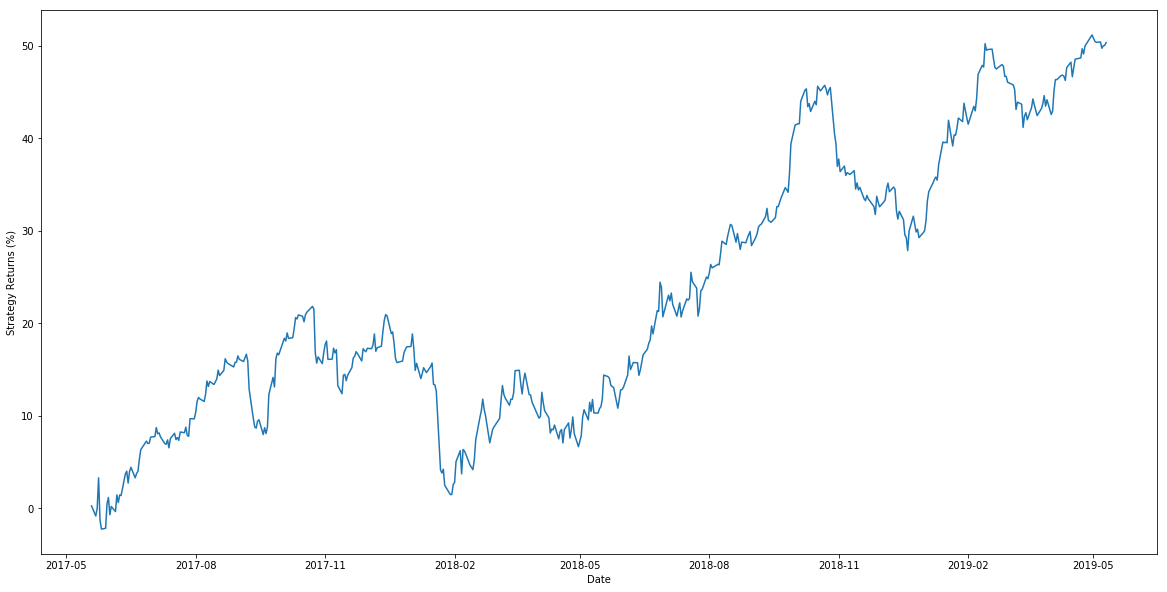

In [65]:
stock_data['Net_cum_returns'] = ((stock_data['Open Price']-stock_data['Close Price'])/stock_data['Open Price']*100).cumsum()

plt.figure(figsize=(20,10))
plt.plot(stock_data.index, stock_data['Net_cum_returns'])
plt.ylabel("Strategy Returns (%)")
plt.xlabel("Date")
plt.show()